<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Первые 5 строк датасета:
       debts   bequests  wife  husband  sons  daughters  father  mother  \
0   89083.21   47843.65     1        0     1          2       0       0   
1   89149.37  243374.33     1        0     5          5       1       0   
2     648.46   17774.84     0        1     3          1       0       0   
3   23549.63  165834.40     0        0     3          4       1       1   
4  199933.12  177838.94     1        0     5          4       1       0   

   brothers  sisters  ...  debts_standard  bequests_standard  wife_standard  \
0         3        3  ...        0.436273          -0.436317       1.273816   
1         0        1  ...        0.437485           2.607576       1.273816   
2         3        0  ...       -1.184573          -0.904409      -0.785043   
3         2        2  ...       -0.764837           1.400485      -0.785043   
4         2        3  ...        2.467948           1.587364       1.273816   

   husband_standard  sons_standard  daughters_sta

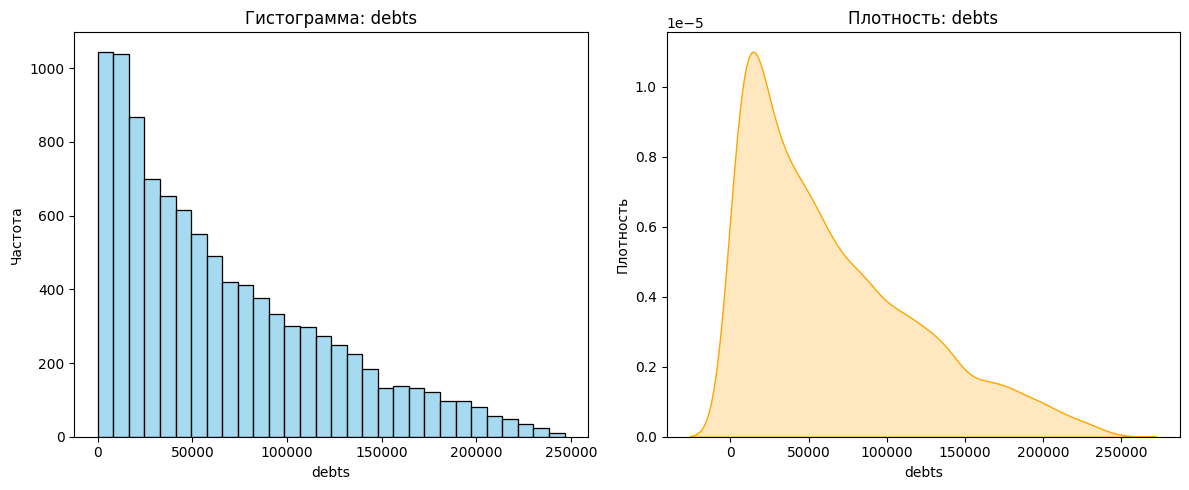

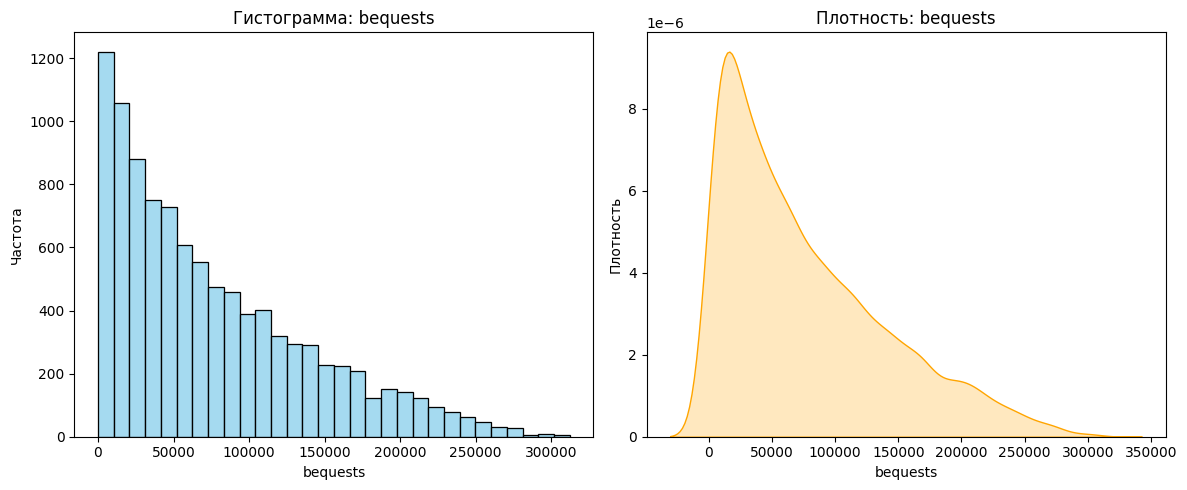

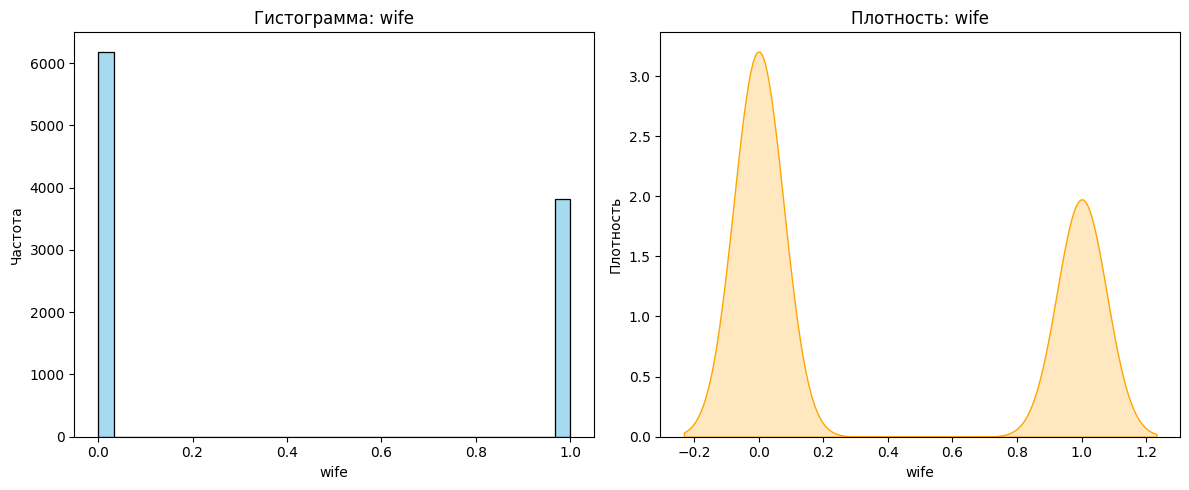

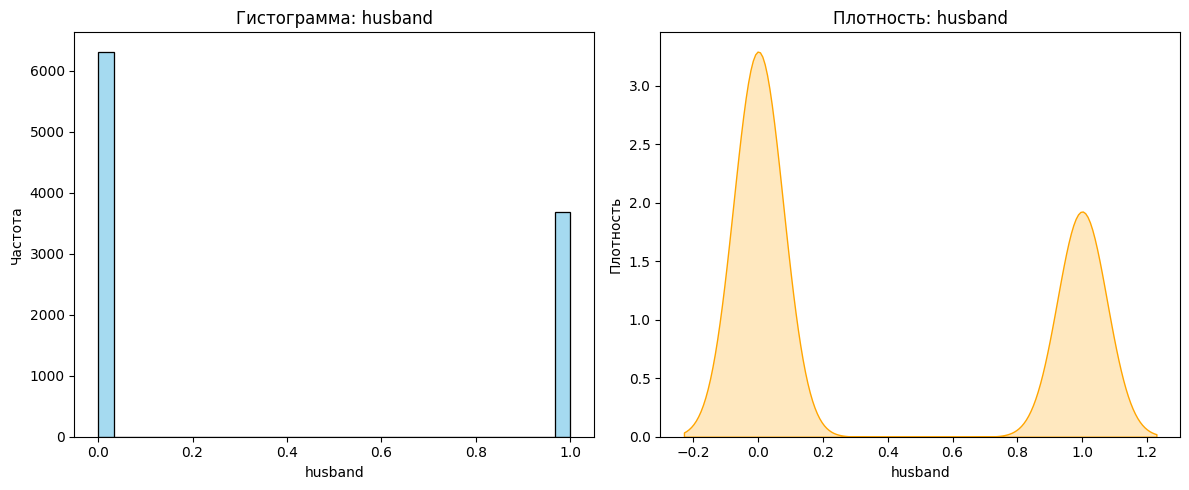

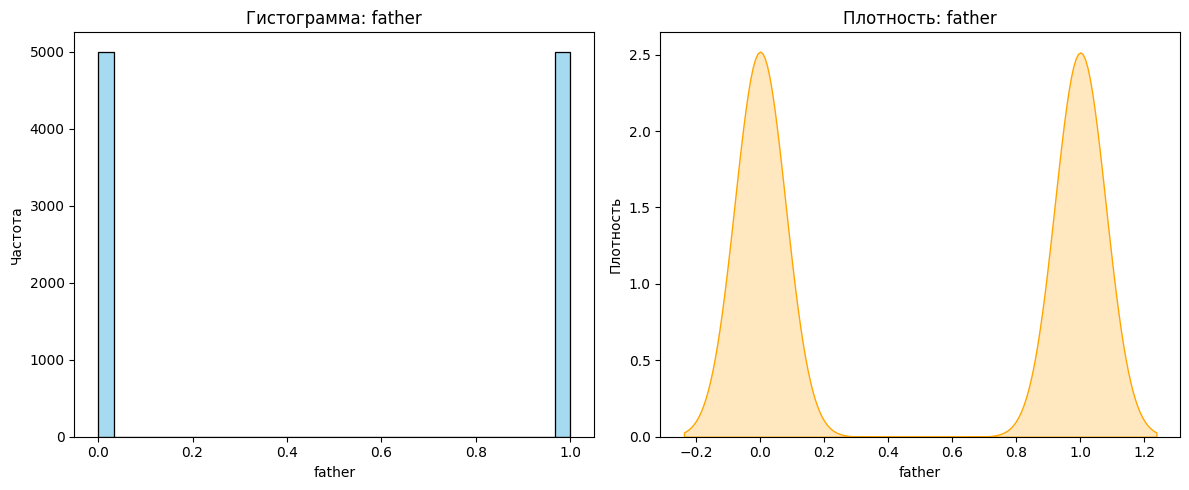

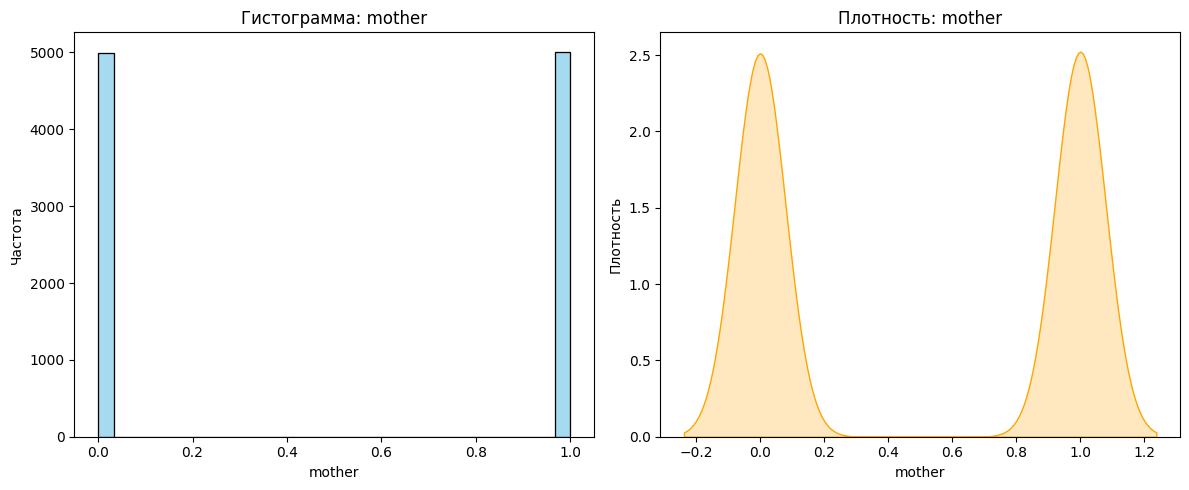

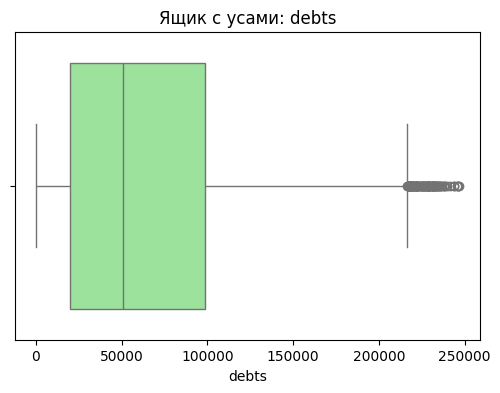

Признак 'debts': 101 выбросов из 10000 наблюдений


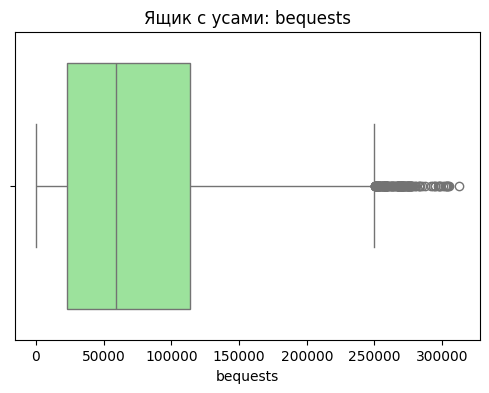

Признак 'bequests': 128 выбросов из 10000 наблюдений


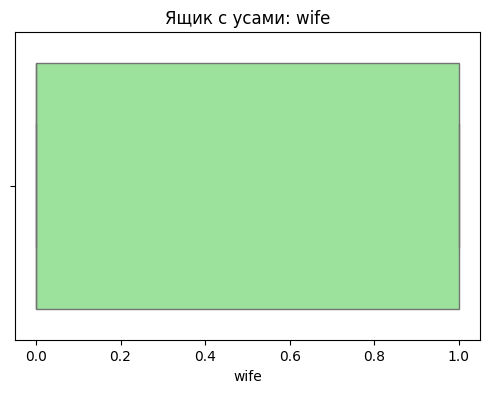

Признак 'wife': 0 выбросов из 10000 наблюдений


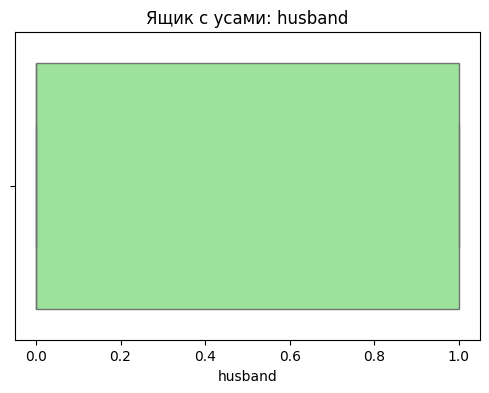

Признак 'husband': 0 выбросов из 10000 наблюдений


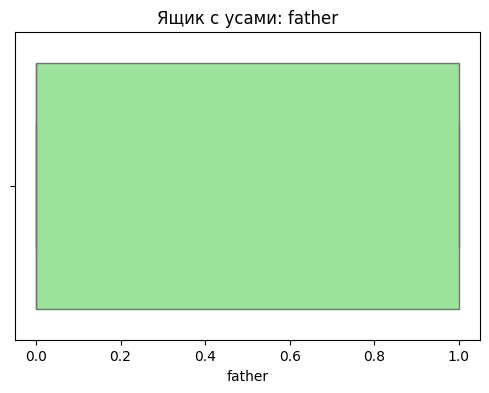

Признак 'father': 0 выбросов из 10000 наблюдений


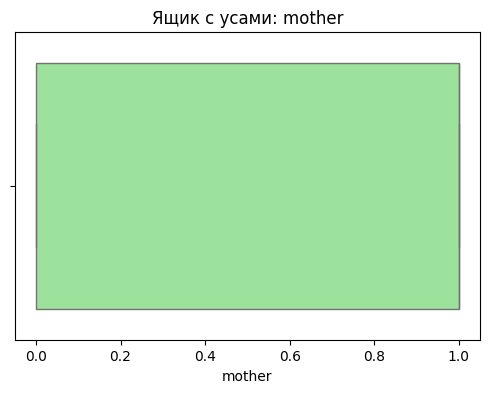

Признак 'mother': 0 выбросов из 10000 наблюдений


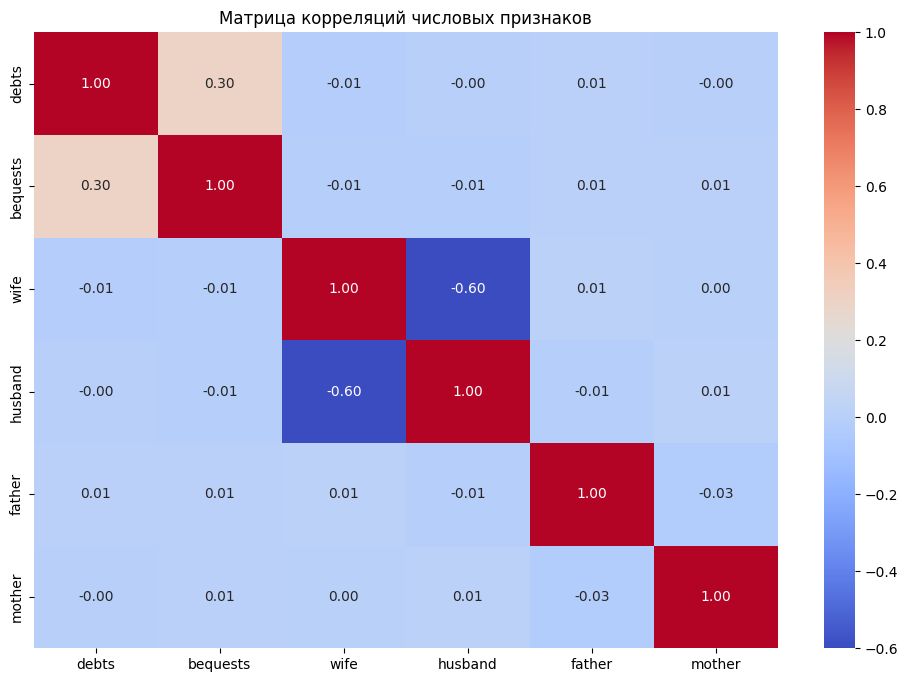


Краткие статистики по числовым признакам:
                debts       bequests         wife       husband        father  \
count   10000.000000   10000.000000  10000.00000  10000.000000  10000.000000   
mean    65279.791296   75871.389092      0.38130      0.369000      0.499500   
std     54563.575184   64240.245253      0.48573      0.482558      0.500025   
min         3.160000       5.890000      0.00000      0.000000      0.000000   
25%     20106.710000   23127.557500      0.00000      0.000000      0.000000   
50%     50657.620000   58804.175000      0.00000      0.000000      0.000000   
75%     98576.520000  113796.285000      1.00000      1.000000      1.000000   
max    246551.580000  312257.580000      1.00000      1.000000      1.000000   

             mother  
count  10000.000000  
mean       0.501100  
std        0.500024  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


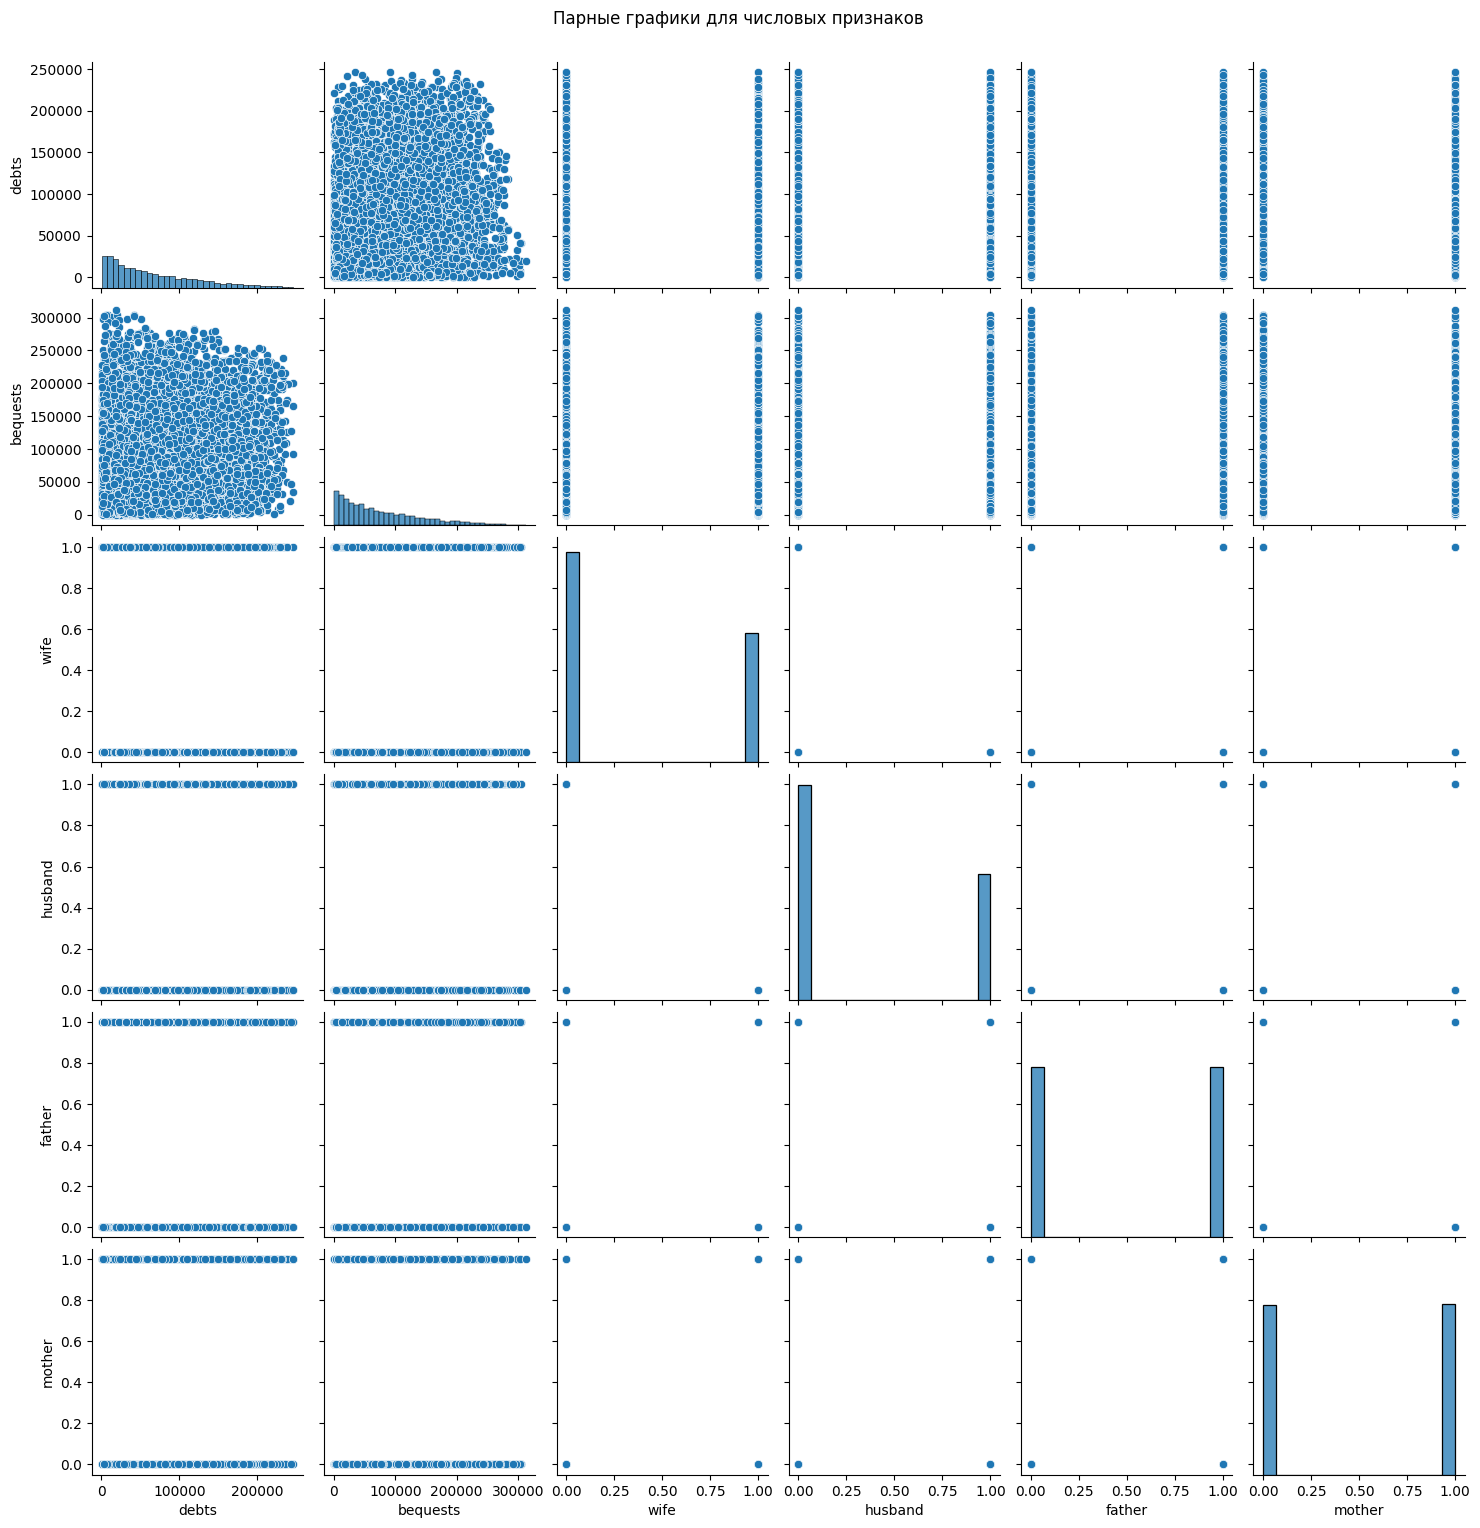


Пример анализа:
- Высокая корреляция между количеством сыновей и дочерей может указывать на большие семьи.
- Финансовые признаки (долги, расходы на похороны, завещания) могут быть скоррелированы между собой.
- Выбросы в признаках debts, bequests и funeral_expenses могут указывать на редкие, но крупные случаи.


In [12]:
# -------------------------------------------------------------- Лабораторная работа №2: Анализ распределений и корреляций

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- Load Data ---

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/inheritance_combined.csv"

print("Первые 5 строк датасета:")
print(df.head())
# --- Feature Lists (adjust if necessary) ---
numerical_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]
categorical_features = ['text']

# --- Check for available features ---
existing_numerical = [col for col in numerical_features if col in df.columns]
existing_categorical = [col for col in categorical_features if col in df.columns]

print(f"Используемые числовые признаки: {existing_numerical}")
print(f"Используемые категориальные признаки: {existing_categorical}")

# --- Clean Data ---
df_num = df[existing_numerical].dropna()
print(f"\nРазмер числового датафрейма после удаления пропусков: {df_num.shape}")

# --- Visualize Distributions ---
for feature in existing_numerical:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_num[feature], bins=30, kde=False, color='skyblue')
    plt.title(f'Гистограмма: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    plt.subplot(1, 2, 2)
    sns.kdeplot(df_num[feature], fill=True, color='orange')
    plt.title(f'Плотность: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Плотность')

    plt.tight_layout()
    plt.show()

# --- Boxplots (Outlier Detection) ---
for feature in existing_numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_num[feature], color='lightgreen')
    plt.title(f'Ящик с усами: {feature}')
    plt.xlabel(feature)
    plt.show()

    # Outlier summary
    q1 = df_num[feature].quantile(0.25)
    q3 = df_num[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = df_num[(df_num[feature] < q1 - 1.5 * iqr) | (df_num[feature] > q3 + 1.5 * iqr)]
    print(f"Признак '{feature}': {len(outliers)} выбросов из {len(df_num)} наблюдений")

# --- Text Feature Analysis ---
if 'text' in df.columns:
    print("\nПримеры текстовых описаний:")
    print(df['text'].head(5))

    df['text_length'] = df['text'].astype(str).apply(len)
    plt.figure(figsize=(8,5))
    sns.histplot(df['text_length'], bins=30, color='purple')
    plt.title('Распределение длины текстовых описаний')
    plt.xlabel('Длина текста')
    plt.ylabel('Частота')
    plt.show()

    print("\nСтатистика по длине текста:")
    print(df['text_length'].describe())

# --- Correlation Matrix ---
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

# --- Summary Statistics ---
print("\nКраткие статистики по числовым признакам:\n", df_num.describe())

# --- Pairplot for deeper analysis (optional, can be slow for large datasets) ---
if len(existing_numerical) <= 6:  # Limit to avoid heavy plots
    sns.pairplot(df_num)
    plt.suptitle("Парные графики для числовых признаков", y=1.02)
    plt.show()

# --- Example Insights ---
print("\nПример анализа:")
print("- Высокая корреляция между количеством сыновей и дочерей может указывать на большие семьи.")
print("- Финансовые признаки (долги, расходы на похороны, завещания) могут быть скоррелированы между собой.")
print("- Выбросы в признаках debts, bequests и funeral_expenses могут указывать на редкие, но крупные случаи.")
